In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [4]:
file = "Resources/cleaned.csv"
data = pd.read_csv(file)
df = pd.DataFrame(data)
df.describe()

,Unnamed: 0,Persons,Males,Females,Rural,Number of Households,Household Size per Household,Females per 1000 Males,"Sex Ratio,0-6 Year Olds",Literate Persons,...,Semi-Permanent Housing Rate,Temporary Housing Rate,Rate of Clean Water Facilities,Communication Facilities per Capita,Drinking Facilities per Capita,Medical Facilities per Capita,Permanent Housing,Semi-Permanent Housing,Temporary Housing,Total Housing
count,489.000000,4.890000e+02,4.890000e+02,4.890000e+02,4.890000e+02,4.890000e+02,489.000000,489.000000,489.000000,4.890000e+02,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,4.890000e+02,4.890000e+02,4.890000e+02,4.890000e+02
mean,311.795501,1.723389e+06,8.920613e+05,8.313273e+05,1.283771e+06,3.213485e+05,5.474438,932.398773,930.611452,9.087351e+05,...,0.345236,0.200612,0.967788,0.000311,0.000909,0.000234,8.643248e+05,5.431092e+05,3.155645e+05,1.722998e+06
std,169.079933,1.304824e+06,6.776682e+05,6.283624e+05,9.323188e+05,2.598191e+05,0.875358,60.189748,47.081334,7.960836e+05,...,0.219539,0.211292,0.106170,0.000298,0.000961,0.000174,8.585636e+05,4.942518e+05,4.358550e+05,1.304375e+06
min,1.000000,3.322400e+04,1.805700e+04,1.478300e+04,2.798300e+04,6.849000e+03,4.000000,591.000000,771.000000,1.342400e+04,...,0.018000,0.001000,0.014706,0.000007,0.000007,0.000003,1.893000e+03,4.483000e+03,2.490000e+02,3.305800e+04
25%,176.000000,8.254540e+05,4.235780e+05,3.910610e+05,6.296520e+05,1.580750e+05,5.000000,892.000000,916.000000,3.955480e+05,...,0.158000,0.035000,0.991150,0.000167,0.000395,0.000141,2.540780e+05,1.659300e+05,3.719300e+04,8.254540e+05
50%,326.000000,1.493462e+06,7.708970e+05,7.165190e+05,1.141744e+06,2.671790e+05,5.000000,938.000000,943.000000,7.573440e+05,...,0.311000,0.116000,0.998830,0.000238,0.000634,0.000197,6.245370e+05,4.144770e+05,1.344830e+05,1.491969e+06
75%,456.000000,2.392638e+06,1.260020e+06,1.134487e+06,1.782066e+06,4.319680e+05,6.000000,974.000000,963.000000,1.219495e+06,...,0.493000,0.316000,1.000000,0.000358,0.000986,0.000272,1.238522e+06,7.815380e+05,4.258860e+05,2.392638e+06
max,588.000000,9.610788e+06,4.916370e+06,4.694418e+06,8.626883e+06,1.827721e+06,8.000000,1146.000000,1035.000000,6.164316e+06,...,0.950000,0.856000,1.000000,0.003446,0.008638,0.001956,6.472952e+06,3.892369e+06,3.786650e+06,9.610787e+06


## Brandon
Is there a correlation between age/literacy, and the number of amenities that are present in each district?

In [39]:
# Create and clean a new DF


Text(0.5, 1.0, 'Literacy Rate v People Per Drinking Facility')

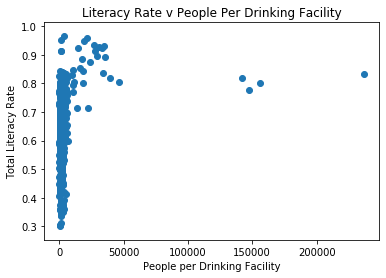

In [41]:
plt.scatter(ageLit_df["People per Drinking Facility"], ageLit_df["Total Literacy Rate"])
plt.xlabel("People per Drinking Facility")
plt.ylabel("Total Literacy Rate")
plt.title("Literacy Rate v People Per Drinking Facility")

Text(0.5, 1.0, 'Literacy Rate v People Per Health Center')

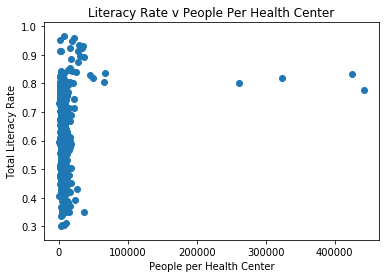

In [42]:
plt.scatter(ageLit_df["People per Health Center"], ageLit_df["Total Literacy Rate"])
plt.xlabel("People per Health Center")
plt.ylabel("Total Literacy Rate")
plt.title("Literacy Rate v People Per Health Center")

## Jake

## Laura

## Matt

## Kevin

Drinking.water.facilities  Safe.Drinking.water
State                                                           
UP                                  96498.0              96444.0
MP                                  51678.0              51505.0
Orrisa                              45765.0              45071.0
Maharashtra                         40918.0              40810.0
Rajasthan                           39646.0              38394.0
Bihar                               39032.0              38935.0
WB                                  37736.0              37605.0
Jharkhand                           29354.0              29028.0
Andhra                              25264.0              23794.0
Assam                               25123.0              24067.0
Karnataka                           24270.0              24146.0
CG                                  19468.0              19379.0
Gujarat                             18055.0              18009.0
HP                                  17454.0

<Figure size 144x360 with 0 Axes>

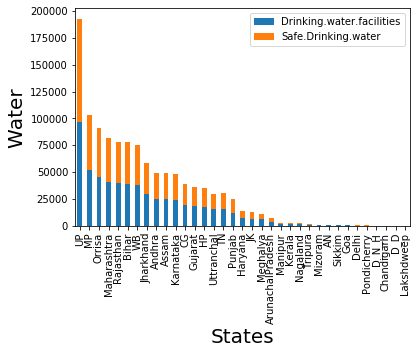

In [4]:
states=df.groupby('State').sum()
states=states[['Drinking.water.facilities','Safe.Drinking.water']]
states=states.sort_values(['Drinking.water.facilities','Safe.Drinking.water'],ascending=[0,0])
print(states)
plt.figure(figsize = (2,5))
states.plot(kind='bar' , stacked =True)
plt.xlabel("States", size = 20)
plt.ylabel("Water", size  = 20)
plt.show()